<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008080		; border-radius: 5px 5px;"><strong>EDA Stock Market (Time Series Analysis)📈</strong></p>  


###### <a href='https://postimg.cc/pykQpjGc' target='_blank'><img src='https://i.postimg.cc/8PgZXBhG/the-american-stock-market-index-sp-500-is-falling-the-red-zig-zag-arrow-behind-the-word-sp-500-on-a.jpg' border='0' alt='the-american-stock-market-index-sp-500-is-falling-the-red-zig-zag-arrow-behind-the-word-sp-500-on-a' style="margin-left: 10%; float: center;  border:5px solid ; width:60%; height : 80%;"/></a>

`The S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchange in the United States.`

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008080		; border-radius: 5px 5px;"><strong>Table of Contents</strong></p>  

<a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:#008080;color:white">Importing libraries<span        class="badge badge-primary badge-pill" style="background-color:orange; color:white">1</span></a>
  
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" style="background-color:#008080;color:white">Importing Datasets<span class="badge badge-primary badge-pill" style="background-color:orange; color:white">2</span></a>
  
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#3" role="tab" aria-controls="settings" style="background-color:#008080;color:white">Analyse closing price of all the stocks<span class="badge badge-primary badge-pill" style="background-color:orange; color:white">3</span></a>
  
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#4" role="tab" aria-controls="settings" style="background-color:#008080;color:white">Analyse the total volume of stock being traded each day<span class="badge badge-primary badge-pill" style="background-color:orange; color:white">4</span></a>
  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" style="background-color:#008080;color:white">Analyse Daily price change in stock<span class="badge badge-primary badge-pill" style="background-color:orange; color:white">5</span></a> 
  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" style="background-color:#008080;color:white"> Analyse monthly mean of close column
<span class="badge badge-primary badge-pill" style="background-color:orange; color:white">6</span></a>

  <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" style="background-color:#008080;color:white">Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated<span class="badge badge-primary badge-pill" style="background-color:orange; color:white">6</span></a> 
  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="settings" style="background-color:#008080;color:white">Analyse Daily return of each stock & how they are co-related<span class="badge badge-primary badge-pill" style="background-color:orange; color:white">7</span></a>

<a id='1'></a><center> <h1 style="background-color:008080; color:008080" ><br>Importing libraries<br></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

<a id='2'></a><center> <h1 style="background-color:008080; color:008080" ><br>Importing Datasets<br></h1></center>

In [2]:
path='../input/sp-500-stock-market'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    data = pd.concat([data, current_df])
    
data.shape

(4752, 7)

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
data['date']=pd.to_datetime(data['date'])

In [6]:
data['date'][0]

0   2013-02-08
0   2014-03-27
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [7]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

<a id='3'></a><center> <h1 style="background-color:008080; color:008080tech_list = data['Name'].unique()
tech_list" ><br>Analyse closing price of all the stocks<br></h1></center>

In [8]:
tech_list = data['Name'].unique()
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

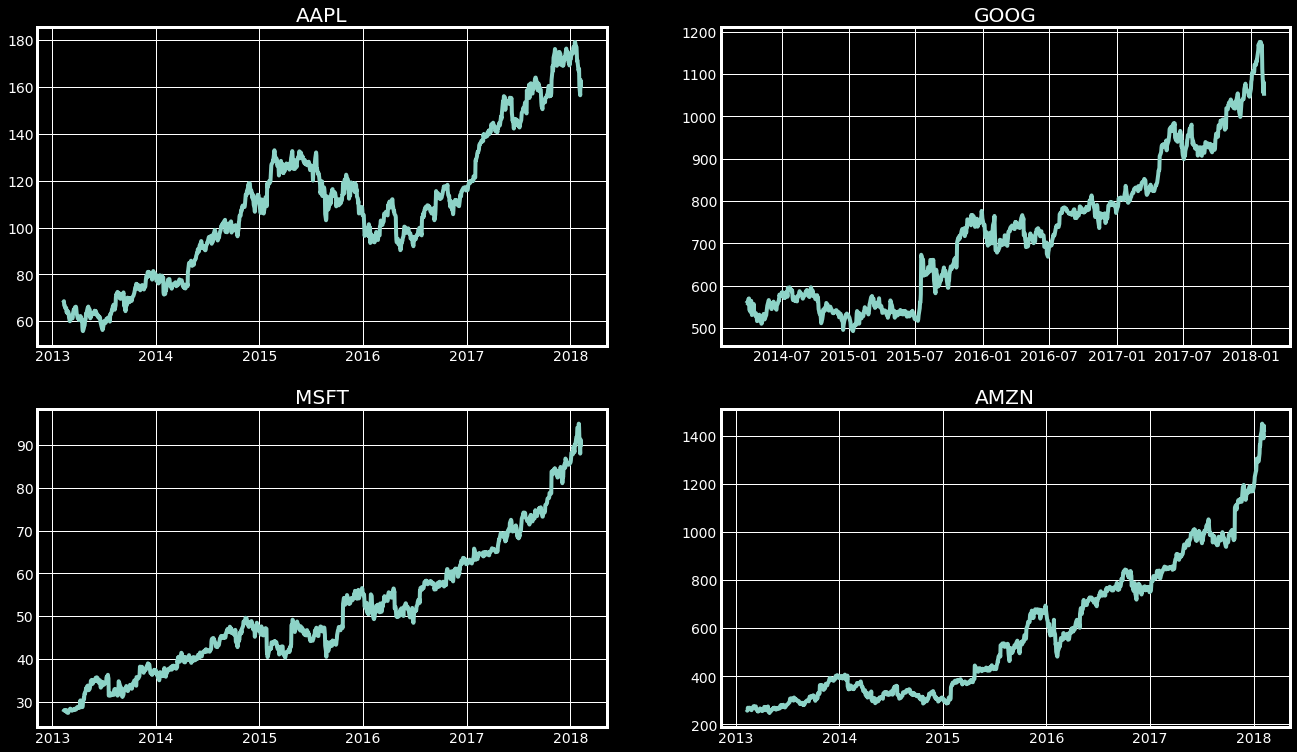

In [9]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=data[data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

<a id='4'></a><center> <h1 style="background-color:008080; color:008080" ><br>Analyse the total volume of stock being traded each day<br></h1></center>

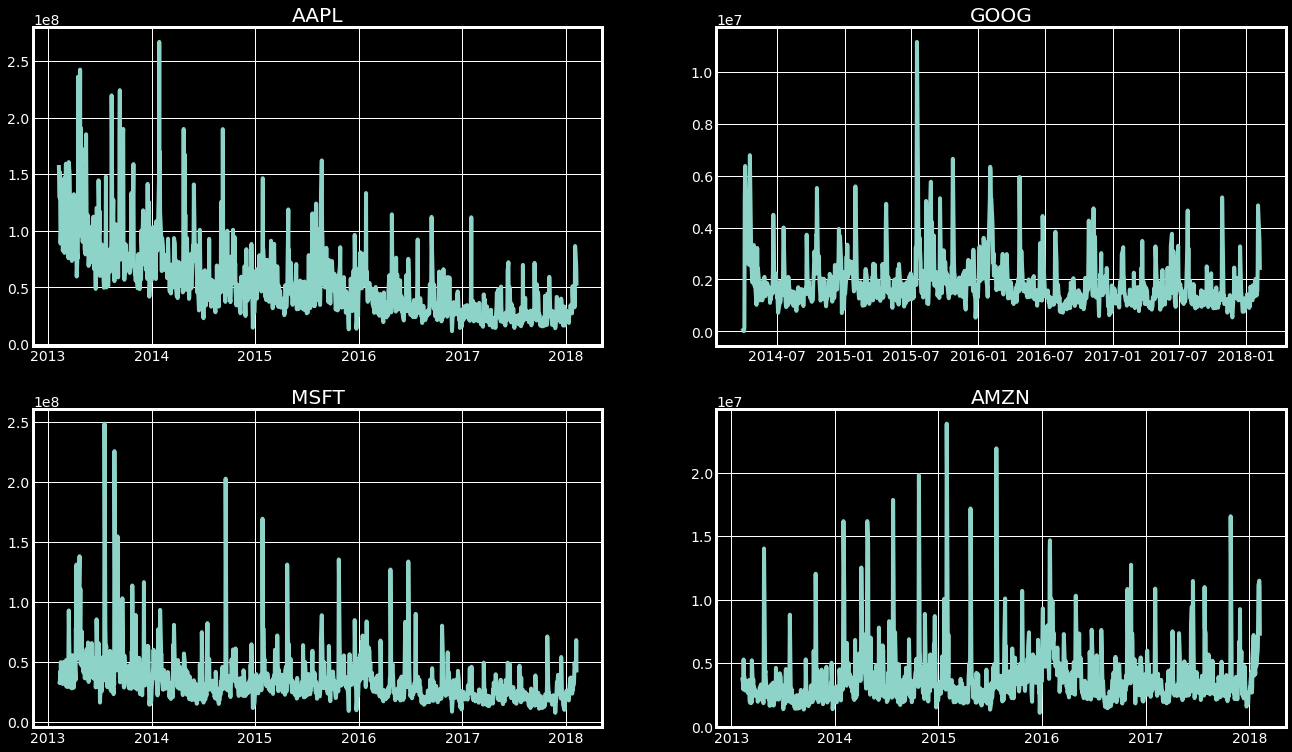

In [10]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=data[data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)

 `using plotly`

In [11]:
for company in (tech_list):
    df=data[data['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company,template = 'plotly_dark')
    fig.show()

<a id='5'></a><center> <h1 style="background-color:008080; color:008080" ><br>Analyse Daily price change in stock<br></h1></center>

##### Daily Stock Return Formula
    `To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company.`

In [12]:
df=pd.read_csv('../input/sp-500-stock-market/AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


* percentage return

In [13]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


In [14]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1day % return'],
      dtype='object')

`using matplotlib for visualisation`

<AxesSubplot:>

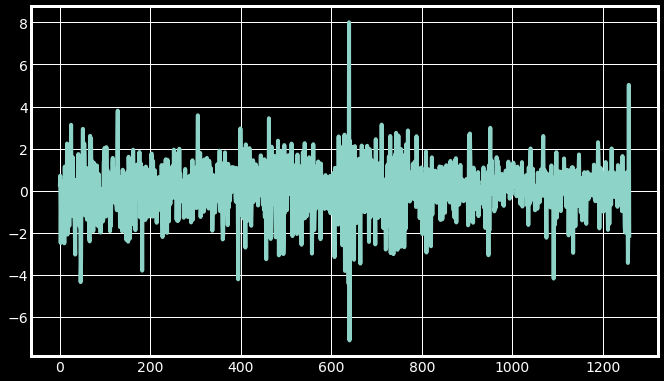

In [15]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()

`using plotly to visualise data`

In [16]:
import plotly.express as px
fig = px.line(df, x="date", y="1day % return", title='Daily price change in stock' ,template = 'plotly_dark')
fig.show()

* date between (2016-01-01 : 2016-03-31) change in stock

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2016-03-17'),
  Text(0.0, 0, '2016-01-04'),
  Text(10.0, 0, '2016-01-19'),
  Text(20.0, 0, '2016-02-02'),
  Text(30.0, 0, '2016-02-17'),
  Text(40.0, 0, '2016-03-02'),
  Text(50.0, 0, '2016-03-16'),
  Text(60.0, 0, '2016-03-31'),
  Text(70.0, 0, '')])

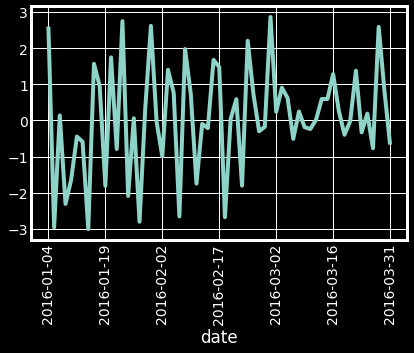

In [17]:
df.set_index('date')['2016-01-01':'2016-03-31']['1day % return'].plot()
plt.xticks(rotation='vertical')

<a id='6'></a><center> <h1 style="background-color:008080; color:008080" ><br> Analyse monthly mean of close column<br></h1></center>

In [18]:
df2=df.copy()

In [19]:
df2.dtypes

date              object
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
1day % return    float64
dtype: object

In [20]:
df2['date']=pd.to_datetime(df2['date'])

In [21]:
df2.set_index('date',inplace=True)

In [22]:
df2.head()

,open,high,low,close,volume,Name,1day % return
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


`Resampling close column month wise`

<AxesSubplot:xlabel='date'>

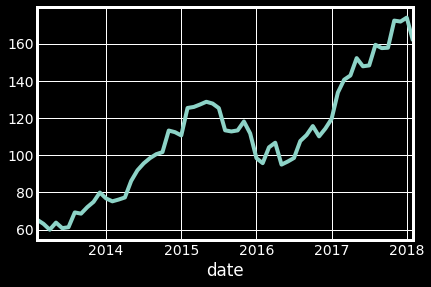

In [23]:
df2['close'].resample('M').mean().plot()

`Resampling close column year wise`

<AxesSubplot:xlabel='date'>

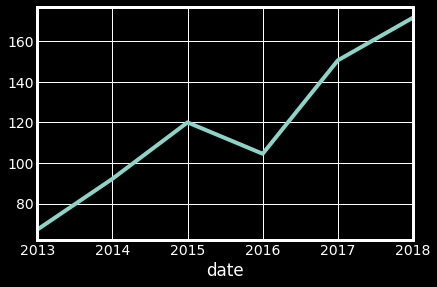

In [24]:
df2['close'].resample('Y').mean().plot()

<a id='7'></a><center> <h1 style="background-color:008080; color:008080" ><br>Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated<br></h1></center>


### Reading data of tech companies

In [25]:
apple=pd.read_csv('../input/sp-500-stock-market/AAPL_data.csv')
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [26]:
google=pd.read_csv('../input/sp-500-stock-market/GOOG_data.csv')
google.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [27]:
Amazon=pd.read_csv('../input/sp-500-stock-market/AMZN_data.csv')
Amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [28]:
Microsoft=pd.read_csv('../input/sp-500-stock-market/MSFT_data.csv')
Microsoft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [29]:
### create a blank dataframe
close=pd.DataFrame()

In [30]:
close['apple']=apple['close']
close['google']=google['close']
close['Amazon']=Amazon['close']
close['Microsoft']=Microsoft['close']

In [31]:
close.head()

,apple,google,Amazon,Microsoft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


`Multi-variate Analysis`

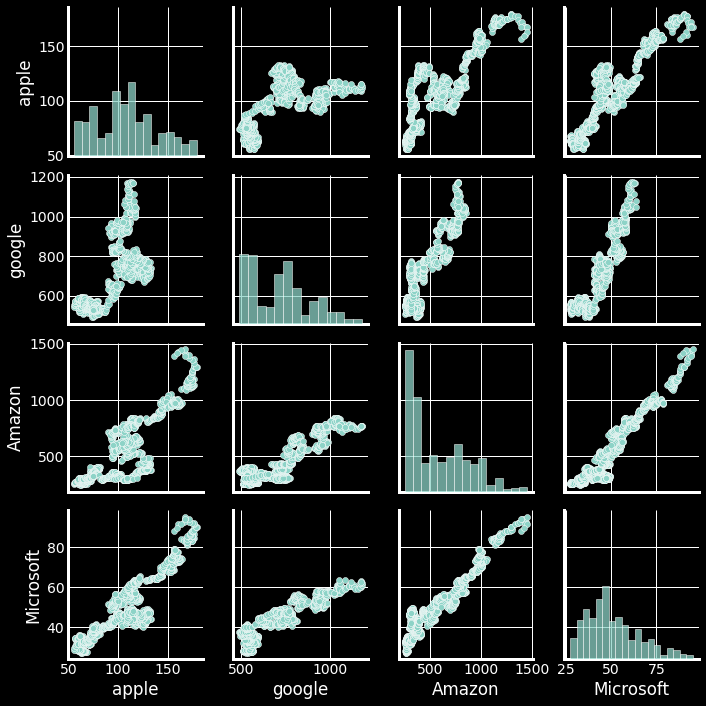

In [32]:
sns.pairplot(data=close)

`Co-relation plot for stock prices`

<AxesSubplot:>

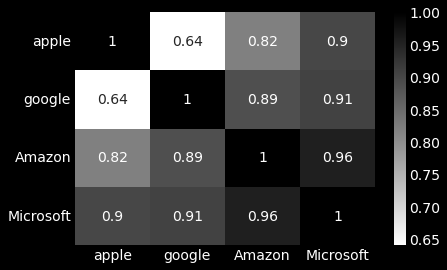

In [33]:
sns.heatmap(close.corr(),annot=True,cmap='gray_r',linecolor="black")

#### Closing price of Google and Microsoft are well correlated
       `and Closing price of Amazon and Microsoft have a co-relation of 0.96`

<a id='8'></a><center> <h1 style="background-color:008080; color:008080" ><br>Analyse Daily return of each stock & how they are co-related<br></h1></center>



In [34]:
data=pd.DataFrame()

In [35]:
data['apple_change']=((apple['close']-apple['open'])/apple['close'])*100
data['google_change']=((google['close']-google['open'])/google['close'])*100
data['Amazon_change']=((Amazon['close']-Amazon['open'])/Amazon['close'])*100
data['Microsoft_change']=((Microsoft['close']-Microsoft['open'])/Microsoft['close'])*100

In [36]:
data.head()

,apple_change,google_change,Amazon_change,Microsoft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


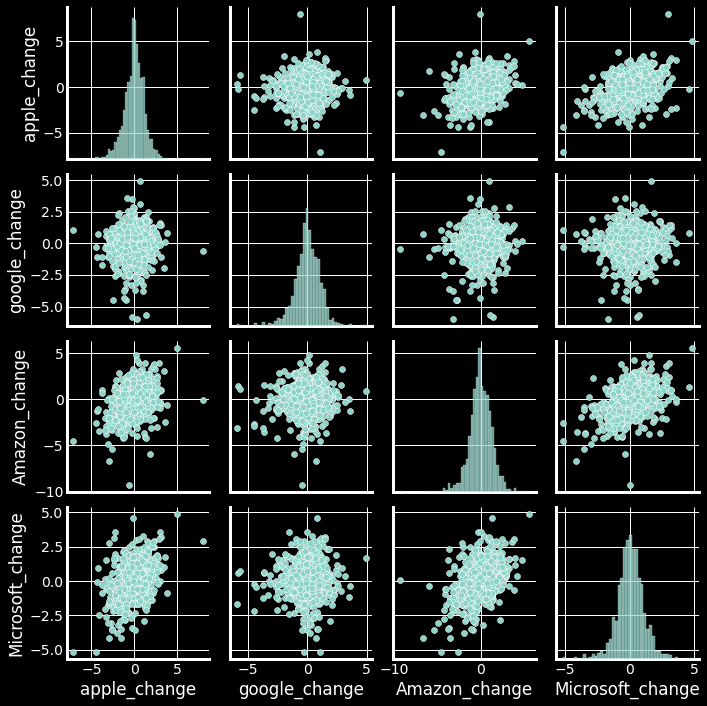

In [37]:
sns.pairplot(data=data)

`Correlation plot for daily returns`

<AxesSubplot:>

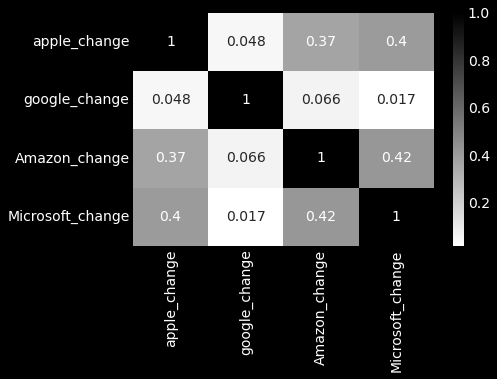

In [38]:
sns.heatmap(data.corr(),annot=True,cmap='gray_r',linecolor="black")

`We can see that Amazon and microsoft have good correlation on daily returns`

<a id = '12.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008080; border-radius: 5px 5px;"><strong>Thanks For Being Here. UPVOTE If Interested</strong></p> 
